# Univariate EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("loan_cleaned.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,purpose,issue_d,loan_status,total_pymnt,default_flag,Profit,income_bucket,int_rate_bucket,issue_year,risk_category
0,5000,36,10.65,162.87,B,B2,10.0,24000.0,27.65,credit_card,2011-12-01,Fully Paid,5863.155187,0,863.155187,Low,Low,2011,Low / Moderate Risk
1,2500,60,15.27,59.83,C,C4,0.0,30000.0,1.00,car,2011-12-01,Charged Off,1008.710000,1,-1491.290000,Low,Medium,2011,High Risk
2,2400,36,15.96,84.33,C,C5,10.0,12252.0,8.72,small_business,2011-12-01,Fully Paid,3005.666844,0,605.666844,Low,Medium,2011,Low / Moderate Risk
3,10000,36,13.49,339.31,C,C1,10.0,49200.0,20.00,other,2011-12-01,Fully Paid,12231.890000,0,2231.890000,Mid,Medium,2011,Low / Moderate Risk
4,3000,60,12.69,67.79,B,B5,1.0,80000.0,17.94,other,2011-12-01,Current,3513.330000,0,513.330000,Mid,Medium,2011,Low / Moderate Risk


In [4]:
df.shape

(39717, 19)

### Loan Amount Distribution

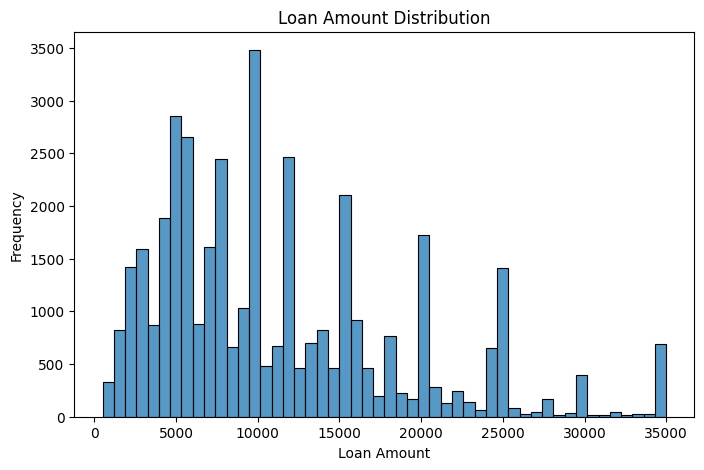

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins = 50)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

The loan amount distribution is **right-skewed**, indicating that while most loans are of lower to moderate value, a small number of high-value loans create a long right tail. This suggests the presence of potential high-risk exposure.  

Most loans fall in the **3,000–₹10,000** range, indicating standard loan sizes preferred by the majority of borrowers.

### Interest Rate Distribution

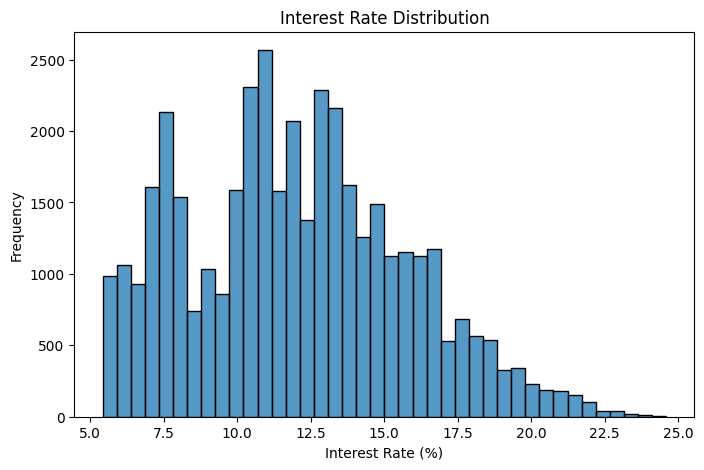

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['int_rate'], bins=40)
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()


The interest rate distribution is **right-skewed**, with most loans priced between **8% and 15%**. Higher interest rates above 18% are relatively rare, indicating risk-based pricing where only a small proportion of high-risk borrowers are charged higher rates.

### Loan Term Distribution

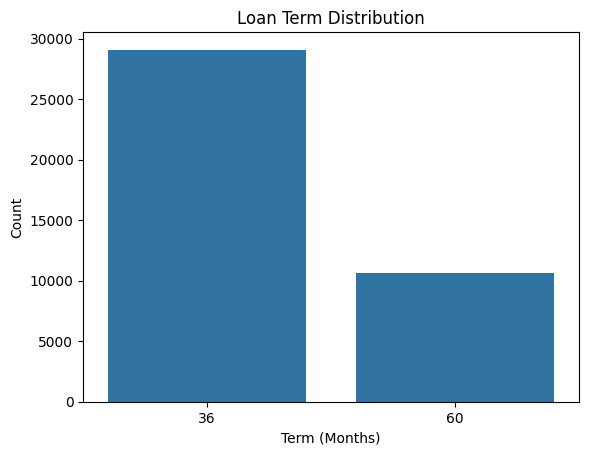

In [7]:
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Term (Months)")
plt.ylabel("Count")
plt.show()


### Grade Distribution

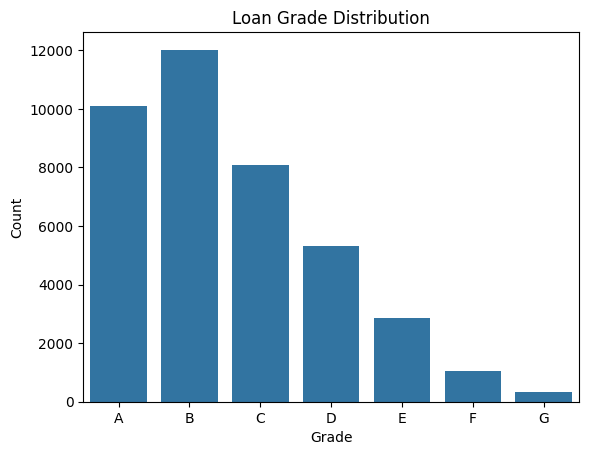

In [8]:
sns.countplot(
    x='grade',
    data=df,
    order=sorted(df['grade'].dropna().unique())
)

plt.title("Loan Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

The majority of loans fall under Grades A, B, and C, indicating that the lender primarily issues loans to low- and medium-risk borrowers. High-risk grades (F and G) are relatively rare, reflecting conservative risk management.

### Profit Distribution

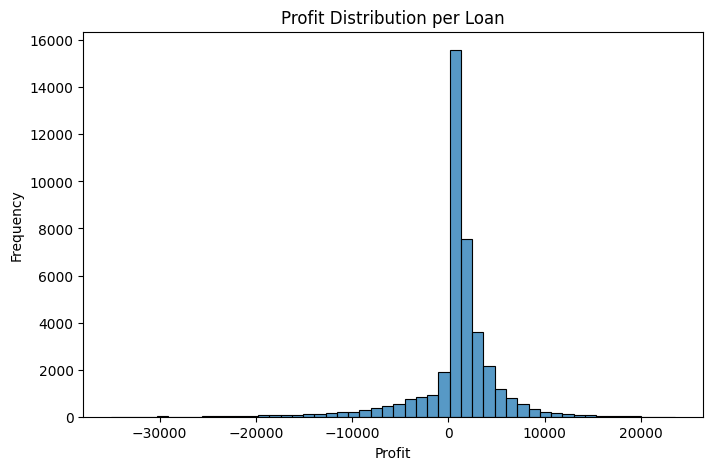

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50)
plt.title("Profit Distribution per Loan")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


The profit distribution is **highly skewed**, with most loans generating small profits **near zero**. However, a small number of loans result in substantial losses, highlighting the financial impact of defaults.  

Most loans earn a **little profit**, but a few bad loans cause big losses.

### Default Flag Distribution

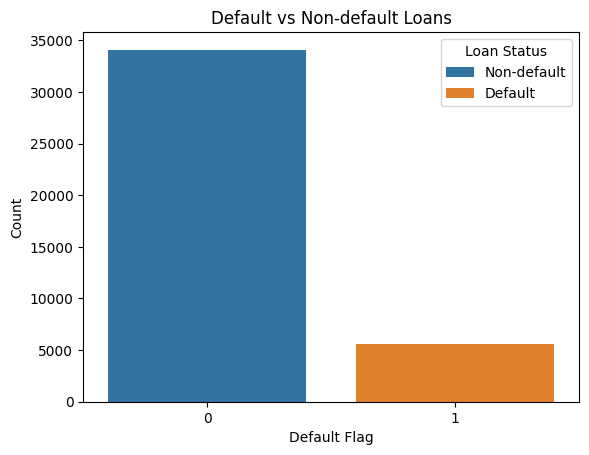

In [11]:
sns.countplot(x='default_flag', hue='default_flag', data=df)

plt.title("Default vs Non-default Loans")
plt.xlabel("Default Flag")
plt.ylabel("Count")

plt.legend(title='Loan Status', labels=['Non-default', 'Default'])

plt.show()


The majority of loans are non-default, while defaulted loans form a much smaller proportion, indicating class imbalance typical of lending datasets.  

Most borrowers repay their loans; only a small number default.

## Univariate EDA Observations

**Univariate EDA indicates that loan amounts and interest rates are right-skewed, most loans are short-term (36 months), higher-grade loans dominate the portfolio, and although defaults are a minority, they represent significant risk exposure.**  

**The data shows mostly small, short-term, low-risk loans, with few defaults that still pose meaningful risk.**